In [1]:
#!/usr/bin/env python

'''
This iPython Notebook Visualized COVID-19 data from the data.cdc.gov APIs
Dataset Name: COVID-19 Case Surveillance Public Use Data with Geography
Dataser URL: https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4
'''

# import all the required libraries to use Panda and Plotly for data visualization
import pandas as pd
import os
from sodapy import Socrata
import numpy as np
import matplotlib
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go
pd.options.plotting.backend = "plotly"
cf.go_offline()

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
# client = Socrata# ("data.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cdc.gov", os.environ["SOCRATA_APP_TOKEN"])

# Get records where Residential State is California, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("n8mc-b4w4", res_state="CA", limit="1000000")

# Convert result to pandas DataFrame
results_df=pd.DataFrame.from_records(results)
# Print result dataframe from the obtained data for COVID-19 cases in California
results_df

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,case_positive_specimen,underlying_conditions_yn
0,2020-12,CA,06,NA,NA,Missing,NA,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,NA,NaN,NaN
1,2020-12,CA,06,NA,NA,Missing,NA,NA,NA,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,NA,NaN,NaN
2,2020-12,CA,06,NA,NA,NA,NA,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Unknown,NA,NaN,NaN
3,2020-03,CA,06,BUTTE,06007,NA,NA,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN,NaN
4,2020-03,CA,06,BUTTE,06007,NA,NA,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,No,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2021-01,CA,06,ORANGE,06059,18 to 49 years,Female,Unknown,Unknown,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Missing,Missing,No,NaN,NaN
999996,2021-01,CA,06,ORANGE,06059,18 to 49 years,Female,Unknown,Unknown,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Missing,Missing,No,NaN,NaN
999997,2021-01,CA,06,ORANGE,06059,18 to 49 years,Female,Unknown,Unknown,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Missing,Missing,No,NaN,NaN
999998,2021-01,CA,06,ORANGE,06059,18 to 49 years,Female,Unknown,Unknown,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN,NaN


In [2]:
# select county column from the result dataframe
cases_by_county = pd.concat([results_df.res_county])
cases_by_county

0             NA
1             NA
2             NA
3          BUTTE
4          BUTTE
           ...  
999995    ORANGE
999996    ORANGE
999997    ORANGE
999998    ORANGE
999999    ORANGE
Name: res_county, Length: 1000000, dtype: object

In [3]:
# count the number of cases by county
cases_by_county.value_counts()

LOS ANGELES        477821
ORANGE              72427
SAN BERNARDINO      52974
RIVERSIDE           45910
SAN DIEGO           38638
SACRAMENTO          26601
KERN                26458
VENTURA             23460
SANTA CLARA         23119
SAN JOAQUIN         21794
FRESNO              21429
ALAMEDA             19781
MONTEREY            13333
CONTRA COSTA        12523
STANISLAUS          11417
MERCED               9079
SAN MATEO            8615
TULARE               7856
PLACER               6859
SONOMA               6454
KINGS                6272
SANTA BARBARA        6174
SAN FRANCISCO        6039
SAN LUIS OBISPO      5939
SOLANO               4956
MADERA               4047
IMPERIAL             4036
YOLO                 3570
MARIN                3551
SANTA CRUZ           3487
BUTTE                2747
SHASTA               2462
EL DORADO            2203
SUTTER               1849
NA                   1813
SAN BENITO           1649
NAPA                 1539
YUBA                 1484
LASSEN      

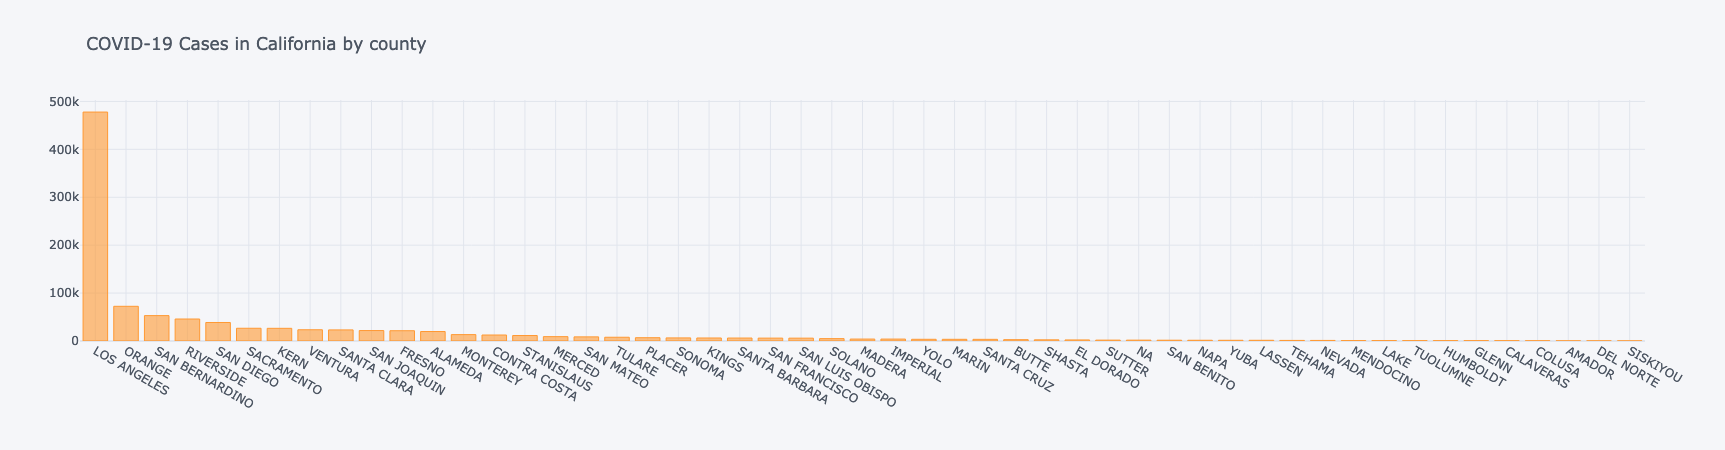

In [4]:
# graph the number of cases by county
cases_by_county.value_counts().iplot(kind="bar",title="COVID-19 Cases in California by county")

In [5]:
# We would create a Panda DataFrame that would allow us to use the county name as an index.
tmp = pd.DataFrame({'cases_by_county':cases_by_county.value_counts()}) 
tmp

,cases_by_county
LOS ANGELES,477821
ORANGE,72427
SAN BERNARDINO,52974
RIVERSIDE,45910
SAN DIEGO,38638
SACRAMENTO,26601
KERN,26458
VENTURA,23460
SANTA CLARA,23119
SAN JOAQUIN,21794


In [6]:
# Remove the cases where we don't have the county information
# Select data where the index != NA
cases_by_county_df = tmp[tmp.index != "NA"]
# sort the results in acceding order by the number of cases
cases_by_county_df = cases_by_county_df.sort_values(by='cases_by_county', ascending=True)
cases_by_county_df

,cases_by_county
SISKIYOU,247
DEL NORTE,318
AMADOR,351
COLUSA,510
CALAVERAS,627
GLENN,665
HUMBOLDT,681
TUOLUMNE,682
LAKE,805
MENDOCINO,841


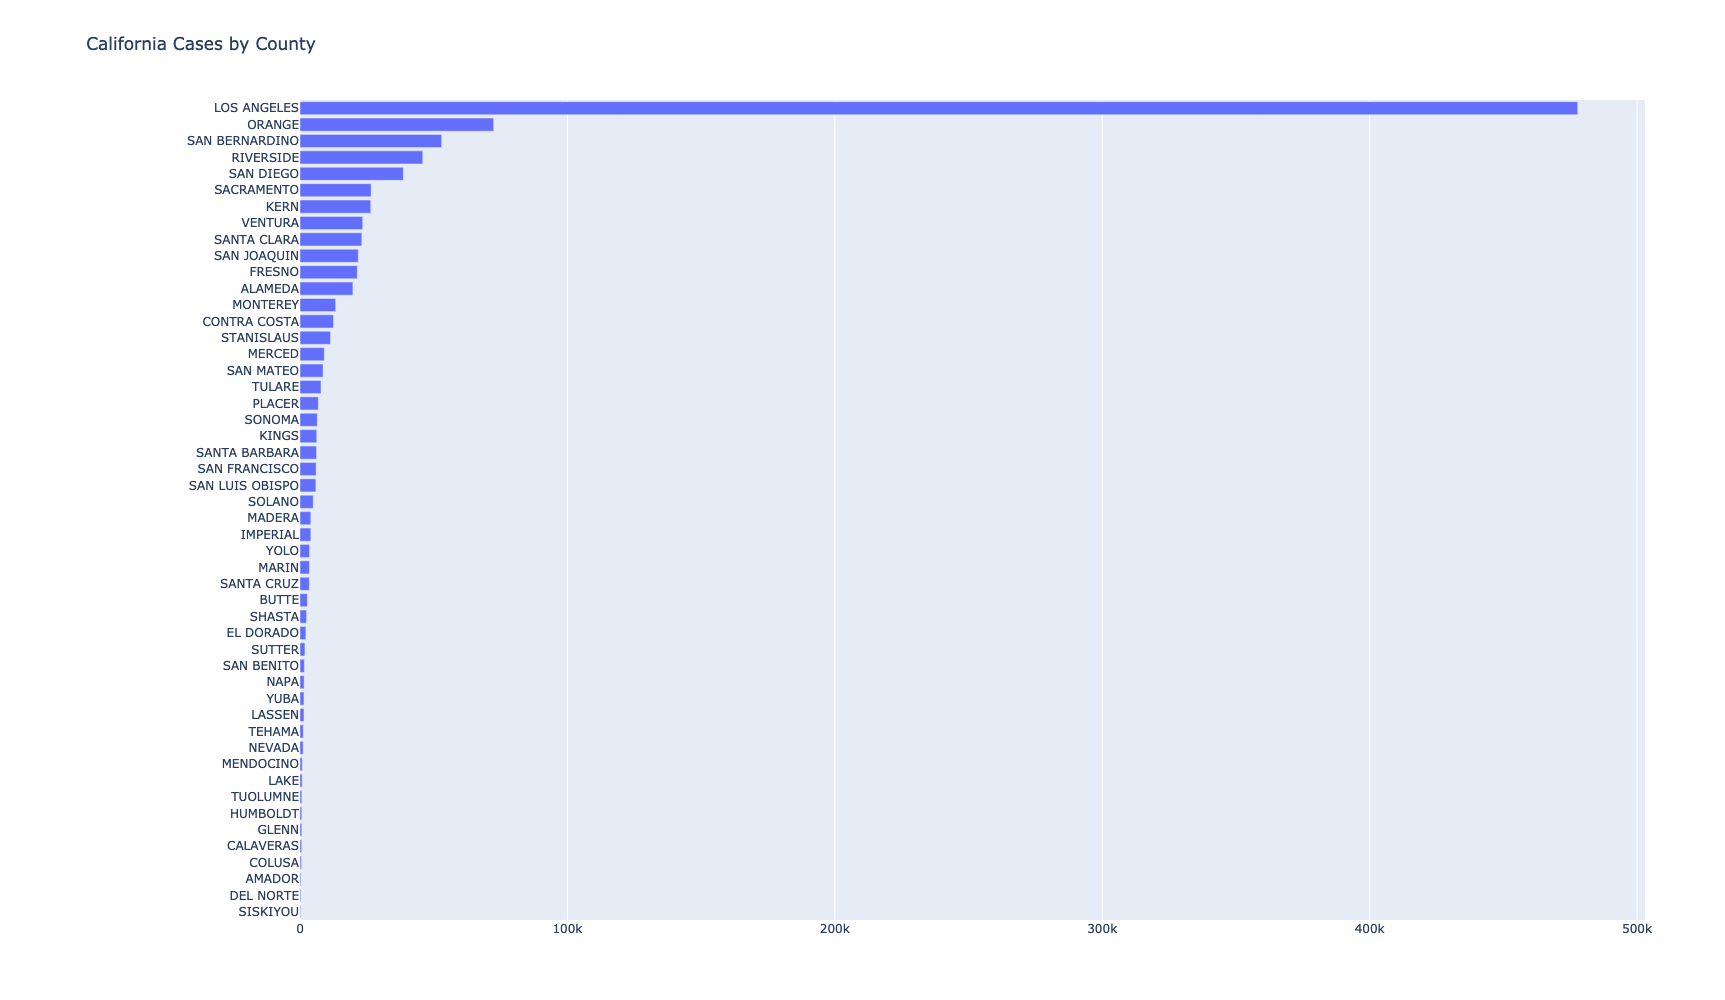

In [7]:
# Create a Plotly Graph Object of type Bar and use the index on the Y axis and the value on the x axis
data = [go.Bar(
                y = cases_by_county_df.index,
                x = cases_by_county_df.cases_by_county,
                orientation='h'
            )]
# create the Plotly layout object
layout = go.Layout(
        height = 1000,
        margin=go.layout.Margin(l=300),
        title = "California Cases by County"
)
# create a Plotly figure object
fig = go.Figure(data=data,layout=layout)
# call the Plotly iplot() and pass the Figure object
py.iplot(fig)

In [8]:
# In the next steps lets find the number of reported cases by county and race

In [9]:
"""
Below is the information related to the 'race' field of the dataset
From https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4
Race [American Indian/Alaska Native; Asian; Black; Multiple/Other; Native Hawaiian/Other Pacific Islander; White; Unknown; Missing; NA, if value suppressed for privacy protection.]
"""
df = pd.DataFrame({'county':results_df.res_county,'race':results_df.race})
df

,county,race
0,NA,NA
1,NA,NA
2,NA,NA
3,BUTTE,NA
4,BUTTE,NA
...,...,...
999995,ORANGE,Unknown
999996,ORANGE,Unknown
999997,ORANGE,Unknown
999998,ORANGE,Unknown


In [10]:
# see all the posible race values
race_values = list()
'''
iterate over the series returned by value_counts() and convert the results to a list
'''
for key,value in pd.concat([df.race]).value_counts().items():
    race_values.append(key)
race_values

['NA',
 'Unknown',
 'White',
 'Multiple/Other',
 'Missing',
 'Asian',
 'Black',
 'Native Hawaiian/Other Pacific Islander',
 'American Indian/Alaska Native']

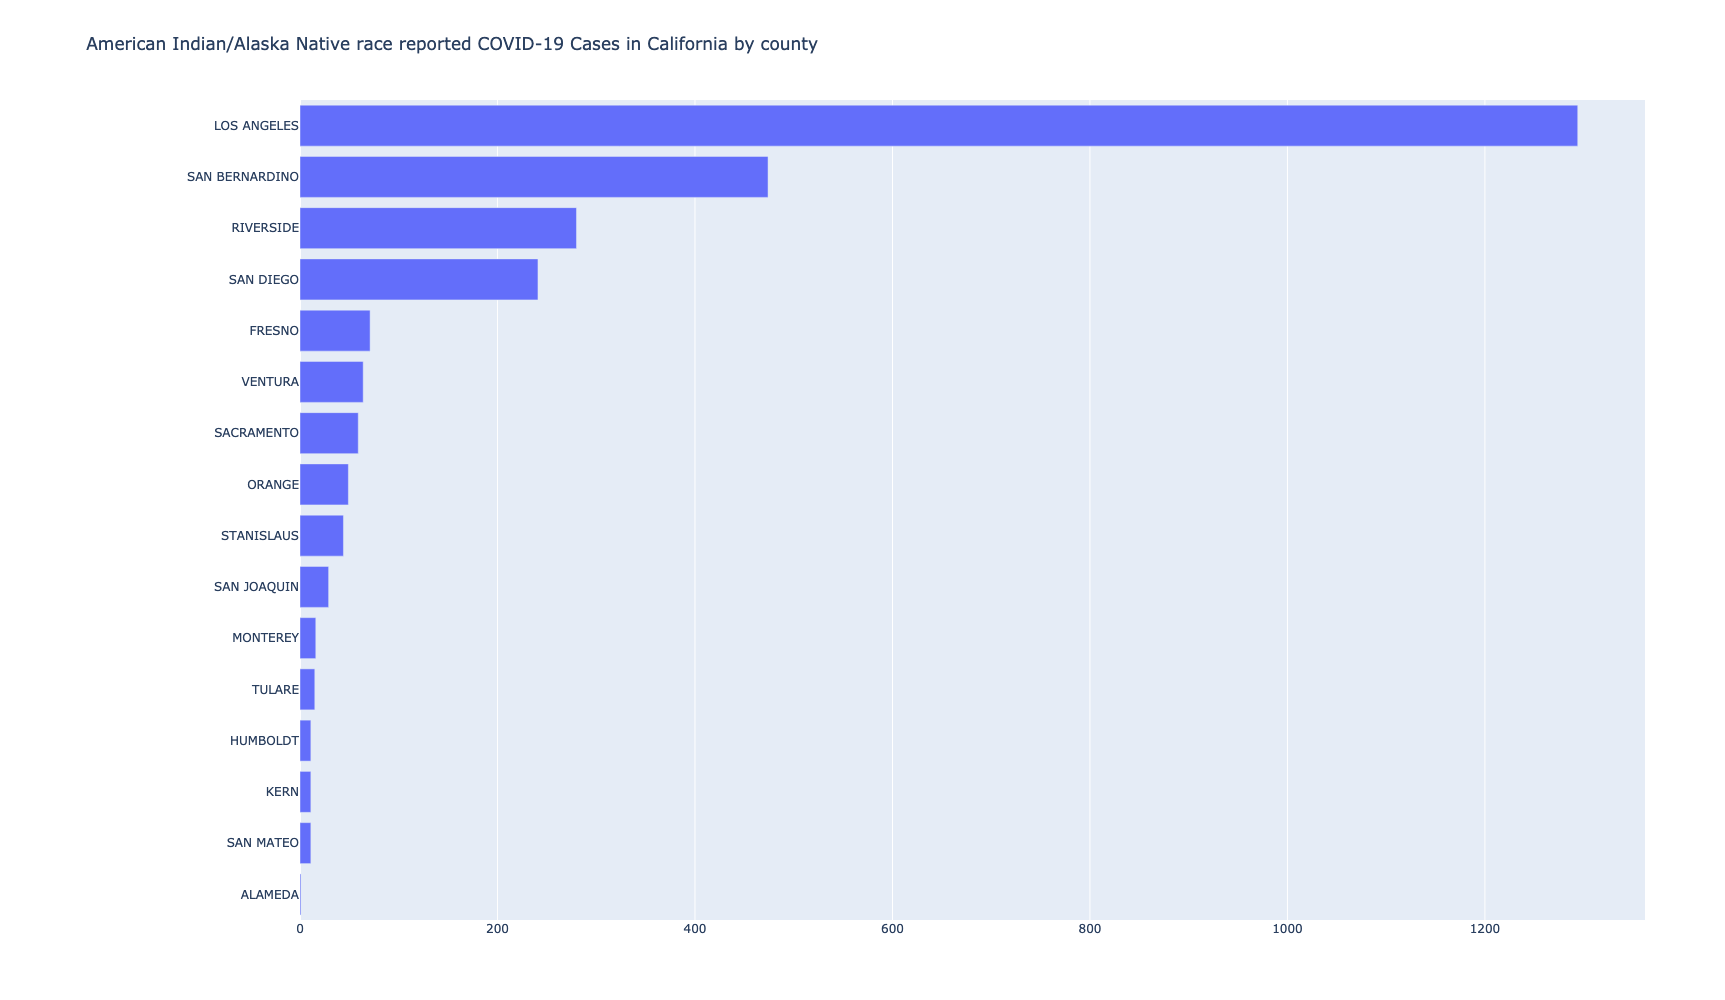

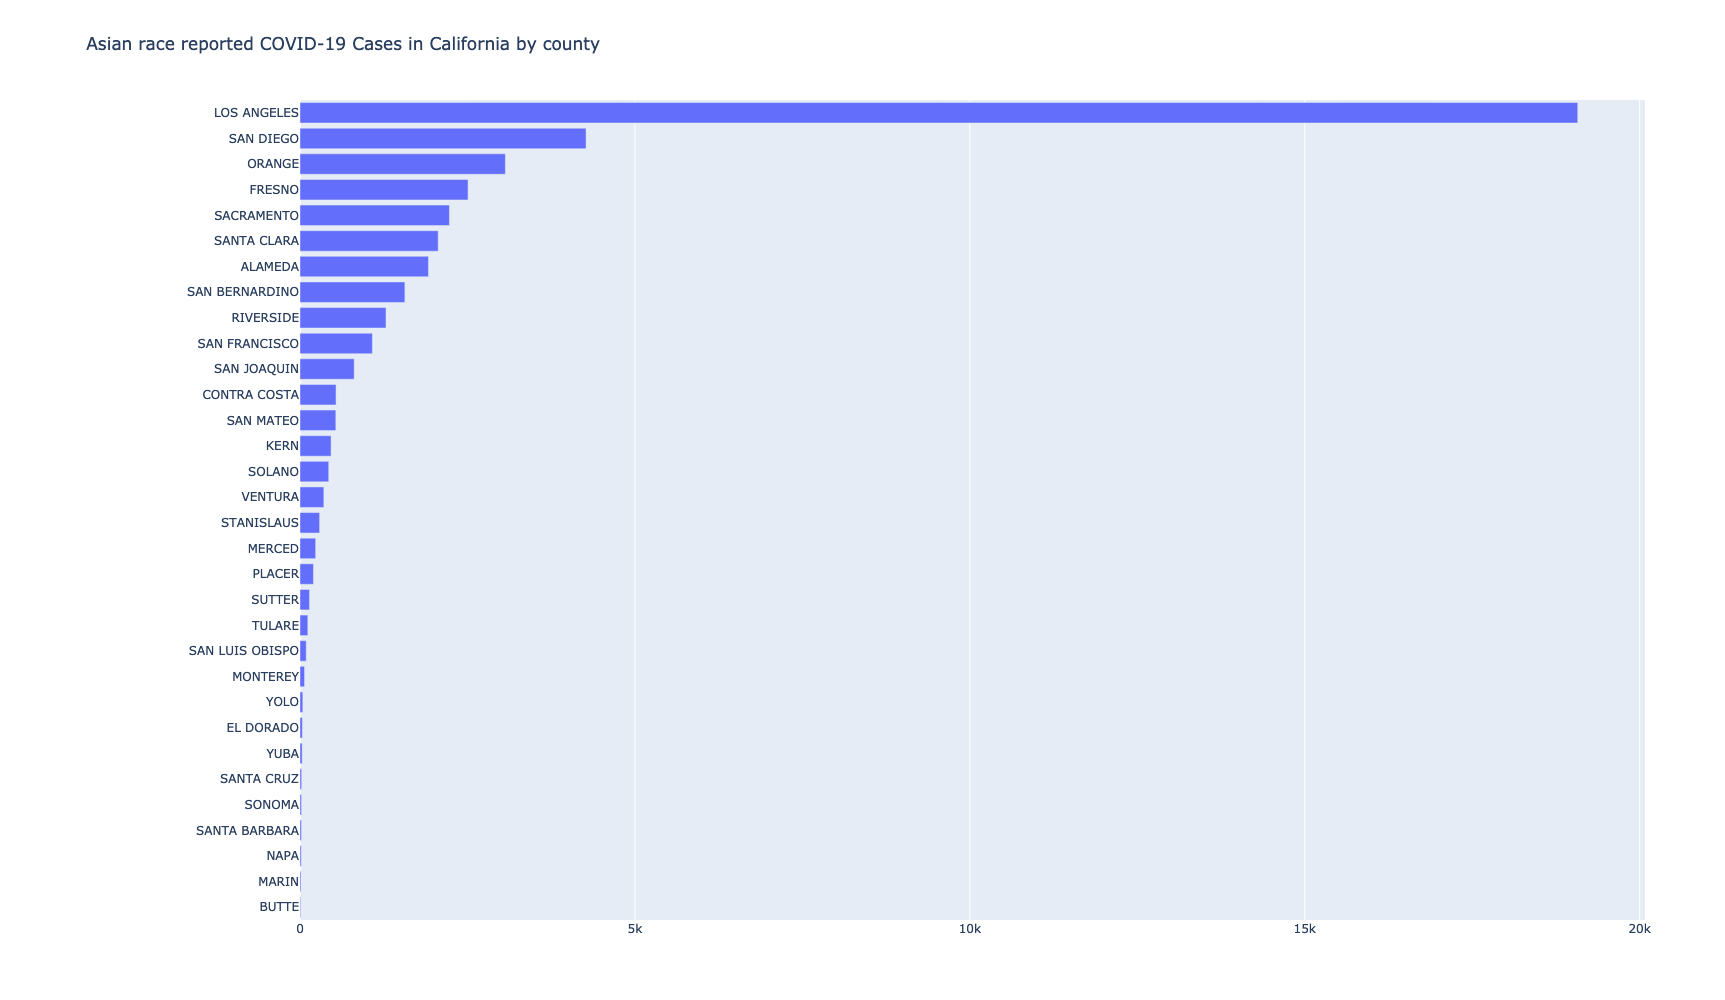

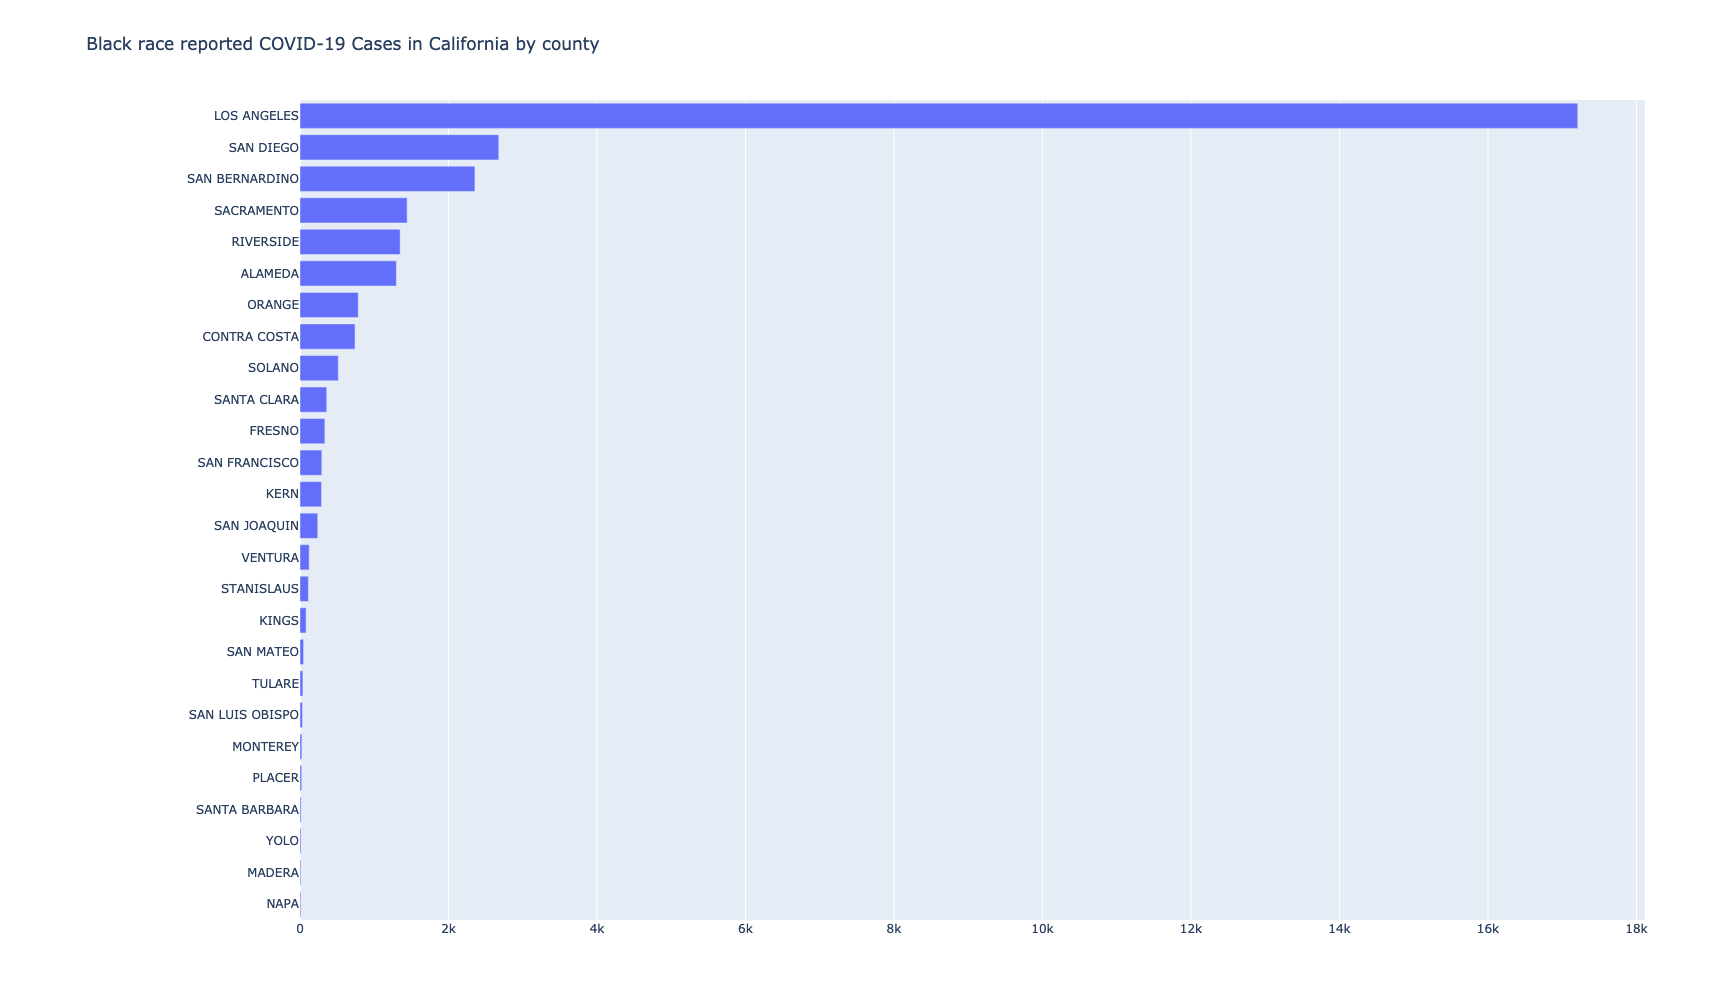

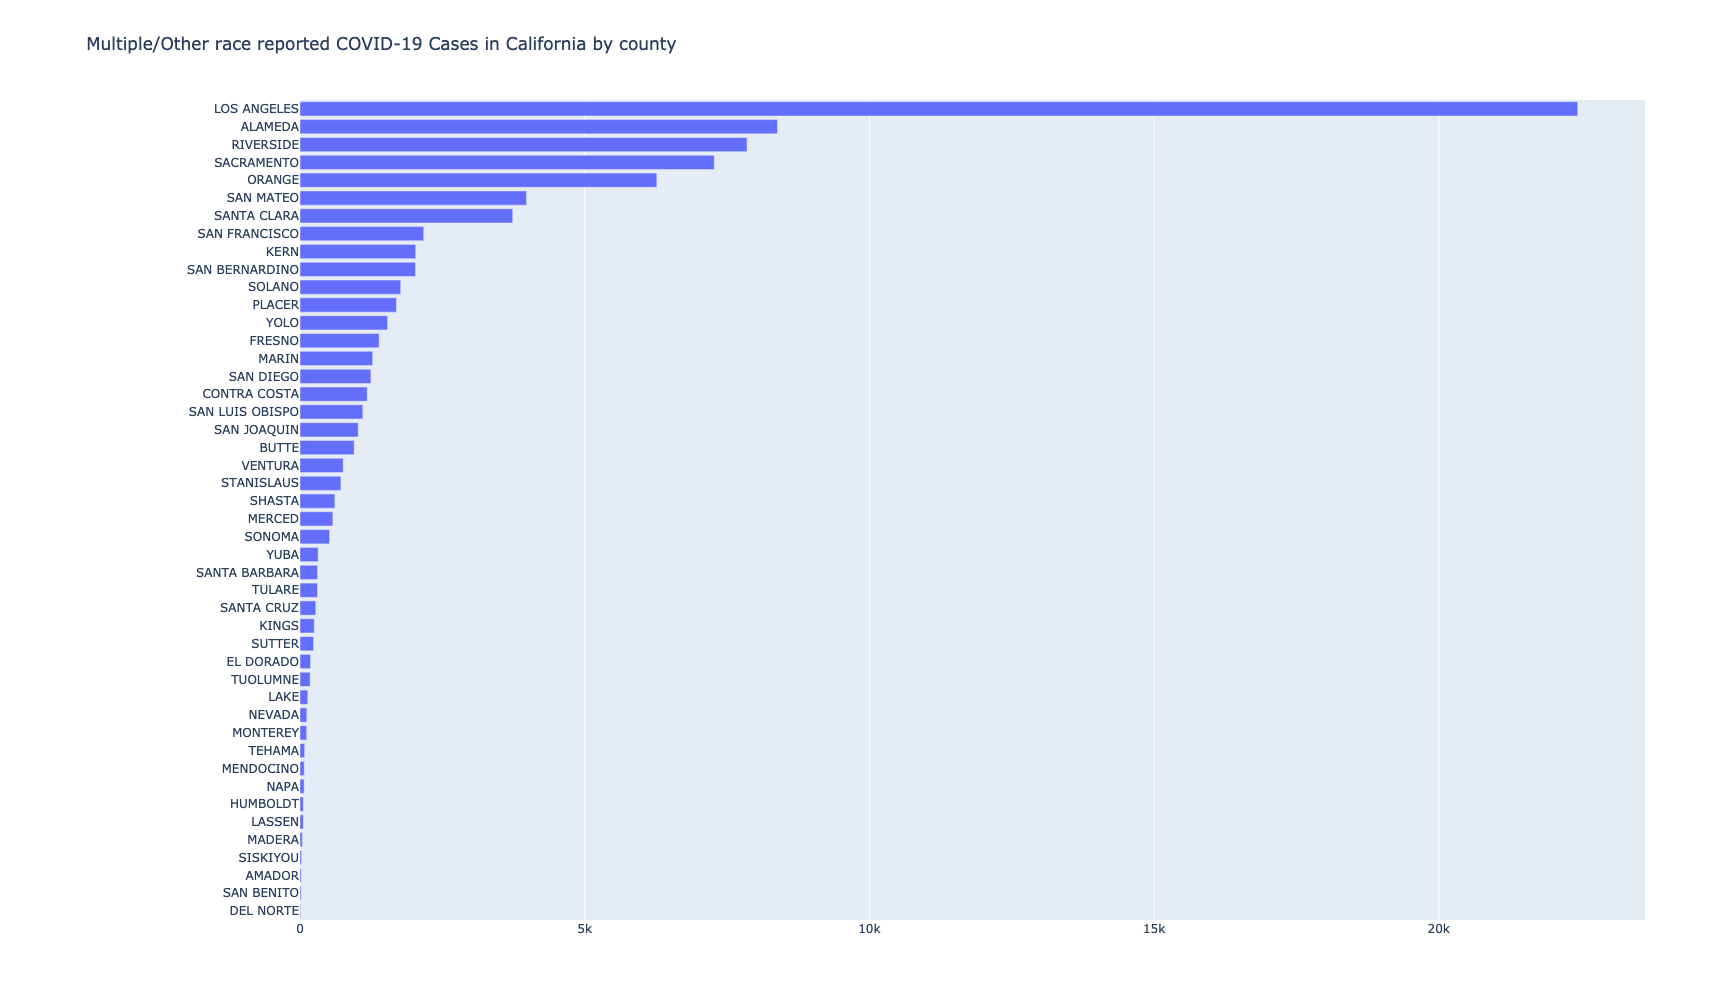

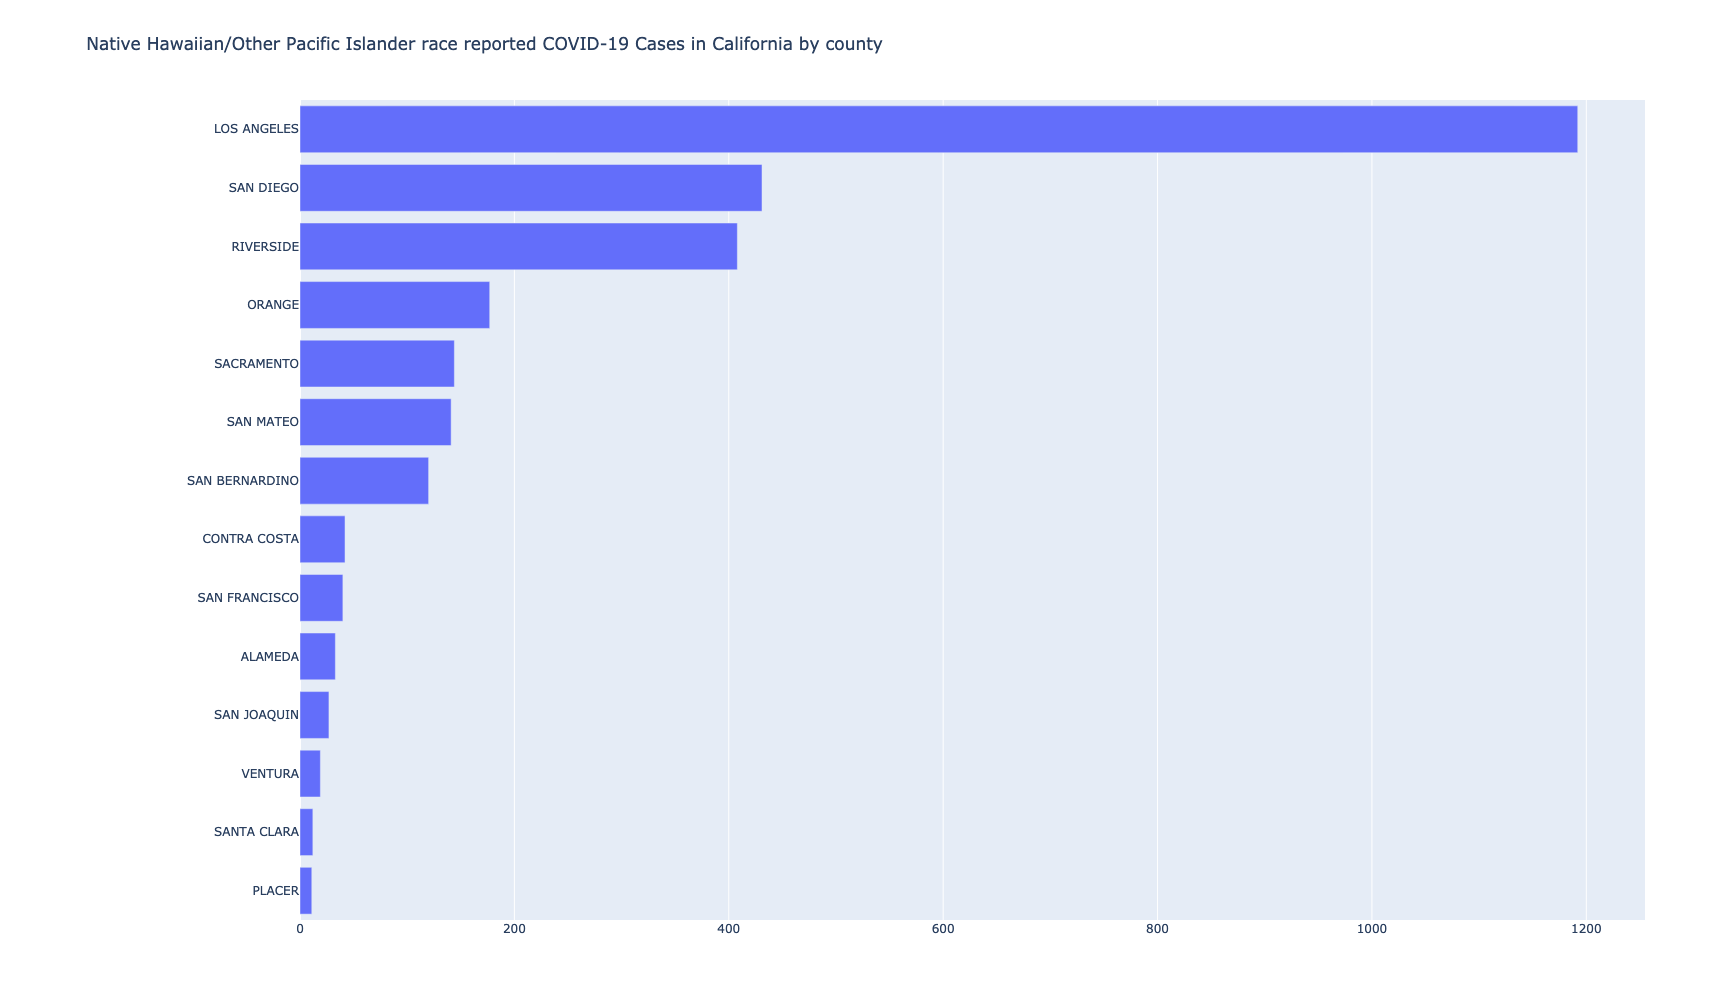

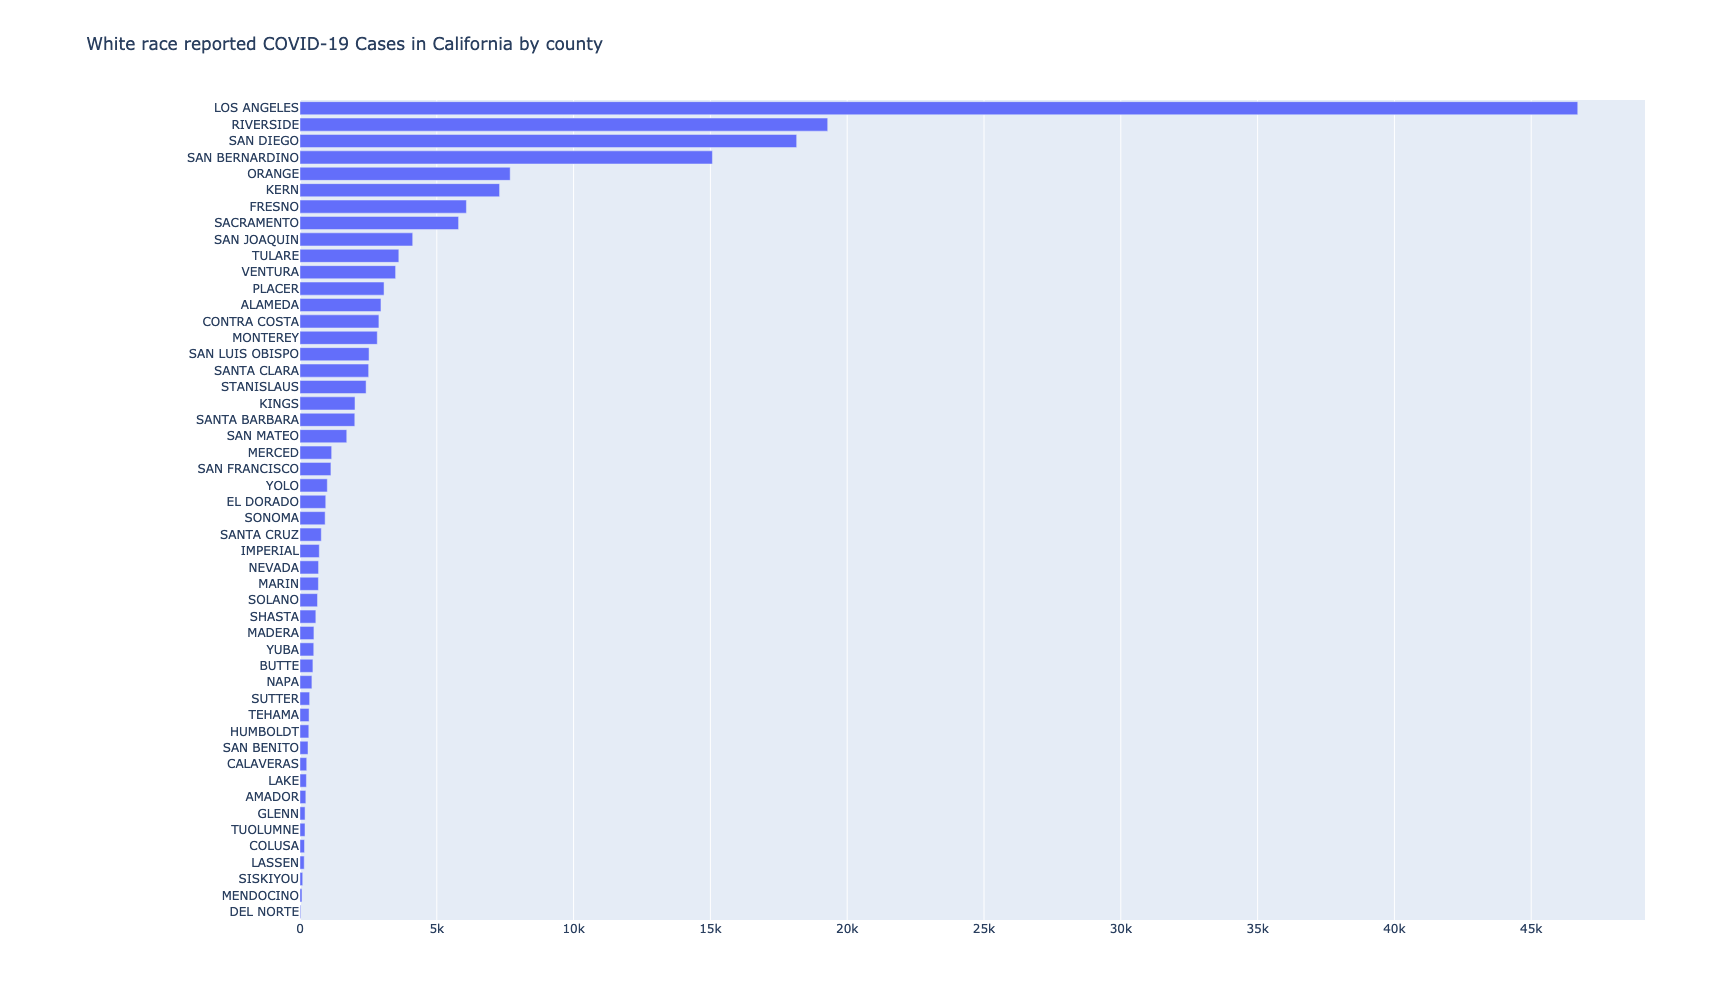

In [11]:
# collect the cases by race and by county. 
# Lets use the race as the key in a dictionary to store the results
race_df_dic = dict()
ignore_values =['NA','Unknown','Missing'] # list of race values to ignore
race_values.sort()
for race in race_values:
    if race not in ignore_values:
        ''' below an example on how to get all the cases where the race was White:
            df[df["race"] == "White"] 
        '''
        race_df_dic[race] = df[df['race'] == race]
# get the number of cases by race by county
race_bycounty_dic = dict()

for race in race_df_dic.keys():
    # count the number of cases for each race and create a dataframe with the results we can graph 
    race_bycounty_dic[race] = pd.DataFrame({'race': pd.concat([race_df_dic[race].county]).value_counts()})
    # remove any 'NA' county
    race_bycounty_dic[race] = race_bycounty_dic[race][race_bycounty_dic[race].index != "NA"]
    # sort the results in ascending order by the number of cases
    race_bycounty_dic[race] = race_bycounty_dic[race].sort_values(by='race',ascending=True)
    # create the data for the grap
    data = [go.Bar(
                y = race_bycounty_dic[race].index,
                x = race_bycounty_dic[race].race,
                orientation='h'
            )]
    # now create our figure layout
    layout = go.Layout(
            height = 1000,
            margin=go.layout.Margin(l=300),
            title = "%s race reported COVID-19 Cases in California by county" % (race)
            )
    # create a figure object
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)
    
    